In [1]:
from imports import *

In [2]:
file_path = '/data/vidales/opana_tree_combined_v2609.root'
file = uproot.open(file_path)
optree = file['opanatree']['OpAnaTree'] # Tree con número de fotoelectrones
print("Keys in optree:", optree.keys())

Keys in optree: ['eventID', 'runID', 'subrunID', 'nuvX', 'nuvY', 'nuvZ', 'nuvT', 'nuvE', 'stepX', 'stepY', 'stepZ', 'stepT', 'dE', 'energydep', 'energydepX', 'energydepY', 'energydepZ', 'E', 'StartPx', 'StartPy', 'StartPz', 'EndPx', 'EndPy', 'EndPz', 'process', 'trackID', 'motherID', 'PDGcode', 'InTimeCosmics', 'InTimeCosmicsTime', 'dEtpc', 'dEpromx', 'dEpromy', 'dEpromz', 'dEspreadx', 'dEspready', 'dEspreadz', 'dElowedges', 'dEmaxedges', 'nopflash', 'flash_id', 'flash_time', 'flash_total_pe', 'flash_pe_v', 'flash_tpc', 'flash_y', 'flash_yerr', 'flash_z', 'flash_zerr', 'flash_x', 'flash_xerr', 'flash_ophit_time', 'flash_ophit_risetime', 'flash_ophit_starttime', 'flash_ophit_amp', 'flash_ophit_area', 'flash_ophit_width', 'flash_ophit_pe', 'flash_ophit_ch']


In [3]:
# Load variables to be predicted and associated data in a single step
hit_nuvT, hit_PE, hit_ch, hit_t = (optree[key].array() for key in ['nuvT', 'flash_ophit_pe', 'flash_ophit_ch', 'flash_ophit_time'])


# Filter out subarrays with more than one neutrino interaction
hit_nuvT_filtered, hit_PE_filtered, hit_ch_filtered, hit_t_filtered = zip(*[
    (subarray_nuvT, subarray_PE, subarray_ch, subarray_t) 
    for subarray_nuvT, subarray_PE, subarray_ch, subarray_t in zip(hit_nuvT, hit_PE, hit_ch, hit_t)
    if len(subarray_nuvT) ==1
])

Flash time distribution chosed is from [0us,2us] in opana_tree_combined_v2609 and opana_tree_combined_v2609_2. There's a peak in 10us. It probably require make another data set.

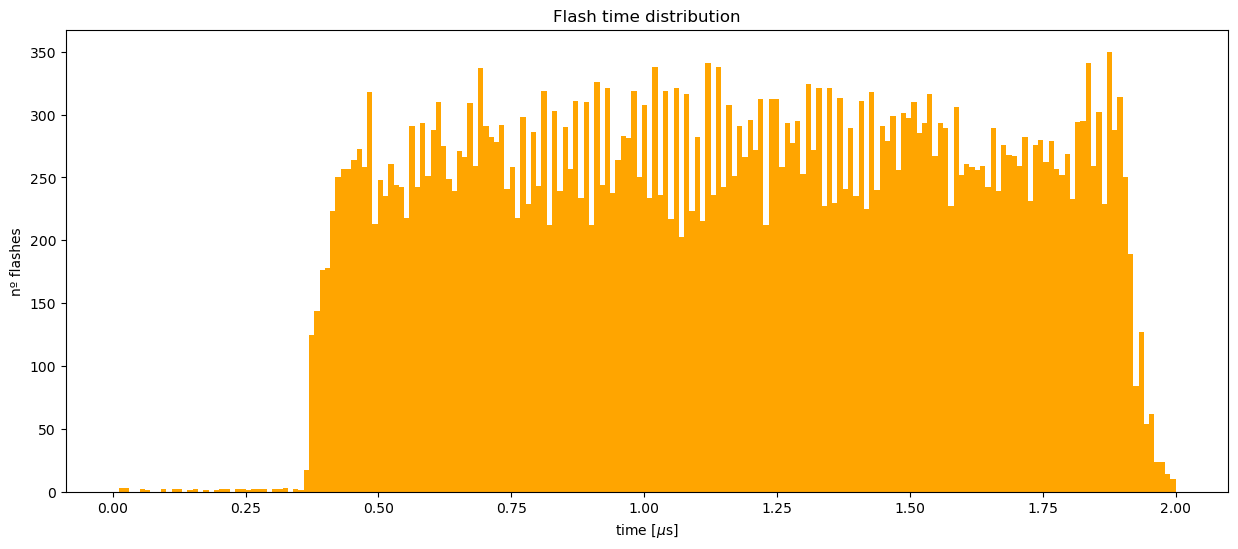

In [4]:
flash_time_flattened = ak.flatten(optree['flash_time'].array(), axis=None)
plot_flash_time_distribution(flash_time_flattened,bins=200)

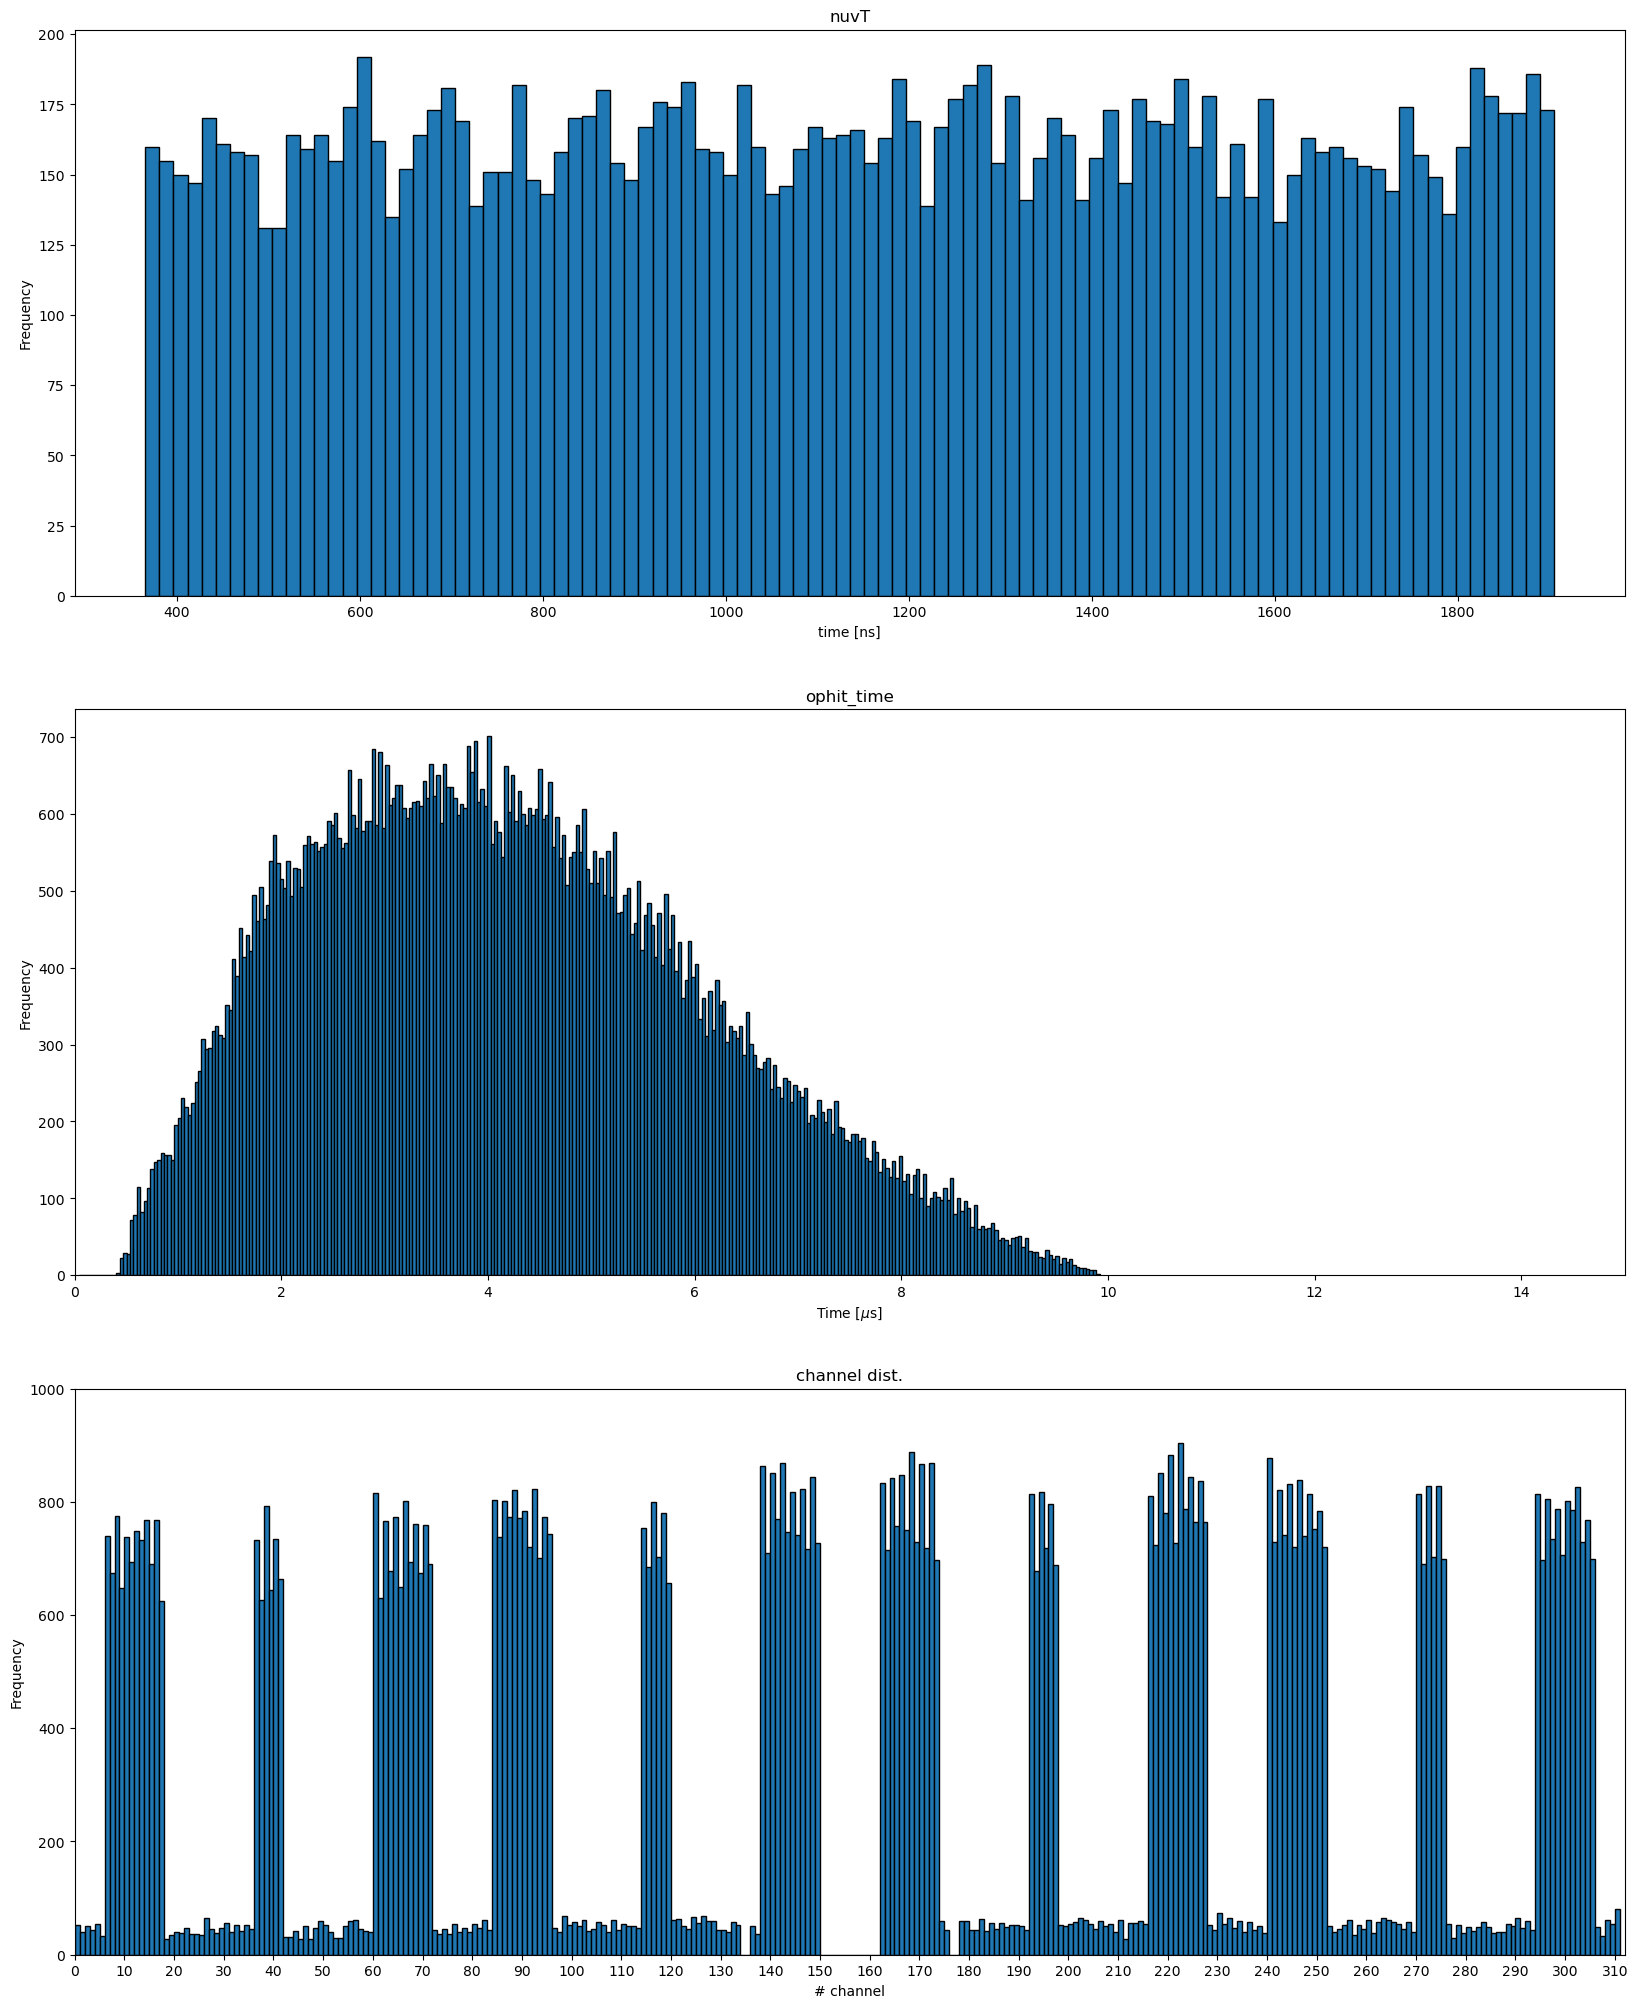

In [5]:
plot_variable_histograms(hit_nuvT, hit_t, hit_ch)

In [3]:
fotoelectrones = np.loadtxt('saved_archives/fotoelectrones_tiempos/fotoelectrones.csv', delimiter=",")
tiempos = np.loadtxt('saved_archives/fotoelectrones_tiempos/tiempos.csv', delimiter=",")

In [4]:
fotoelectrones_sums = np.sum(fotoelectrones, axis=0)
tiempos_sums = np.sum(tiempos, axis=0)

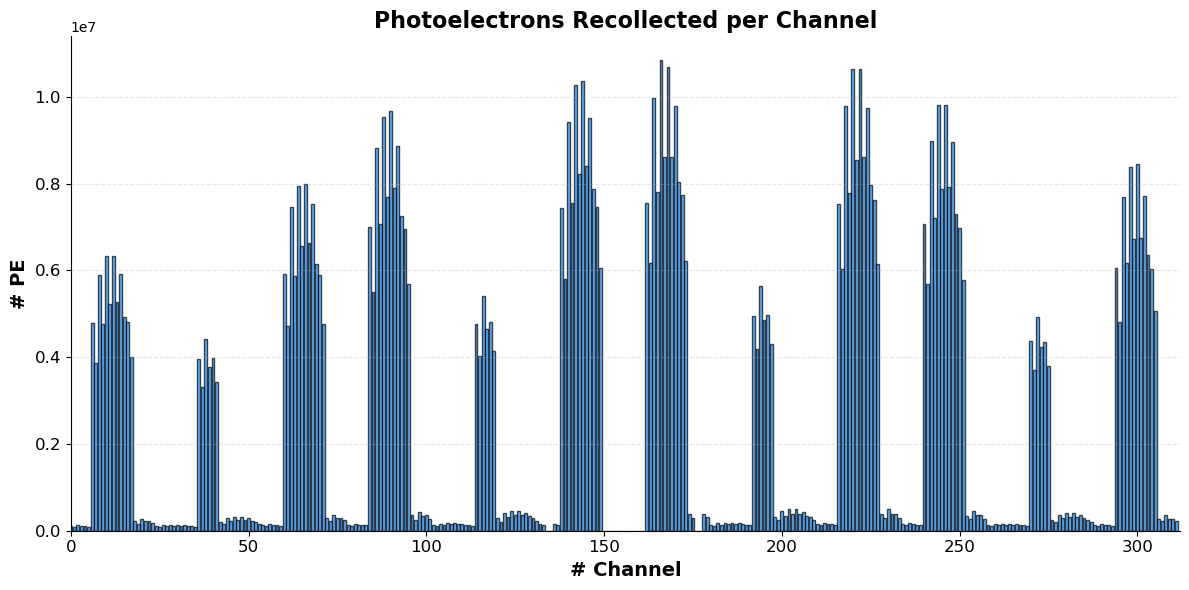

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Bar plot with transparency, gradient, and a modern color palette
plt.bar(range(len(fotoelectrones_sums)), fotoelectrones_sums, 
        color='dodgerblue', edgecolor='black', alpha=0.7)

# Axis labels and title with improved font size and weight
plt.xlabel('# Channel', fontsize=14, weight='bold')
plt.ylabel('# PE', fontsize=14, weight='bold')
plt.title('Photoelectrons Recollected per Channel', fontsize=16, weight='bold')

# Customize the x and y axis
plt.xlim(0, 312)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the grid and spines
plt.grid(axis='y', alpha=0.3, linestyle='--')  # Light gridlines
plt.gca().spines['top'].set_visible(False)  # Hide top border
plt.gca().spines['right'].set_visible(False)  # Hide right border

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

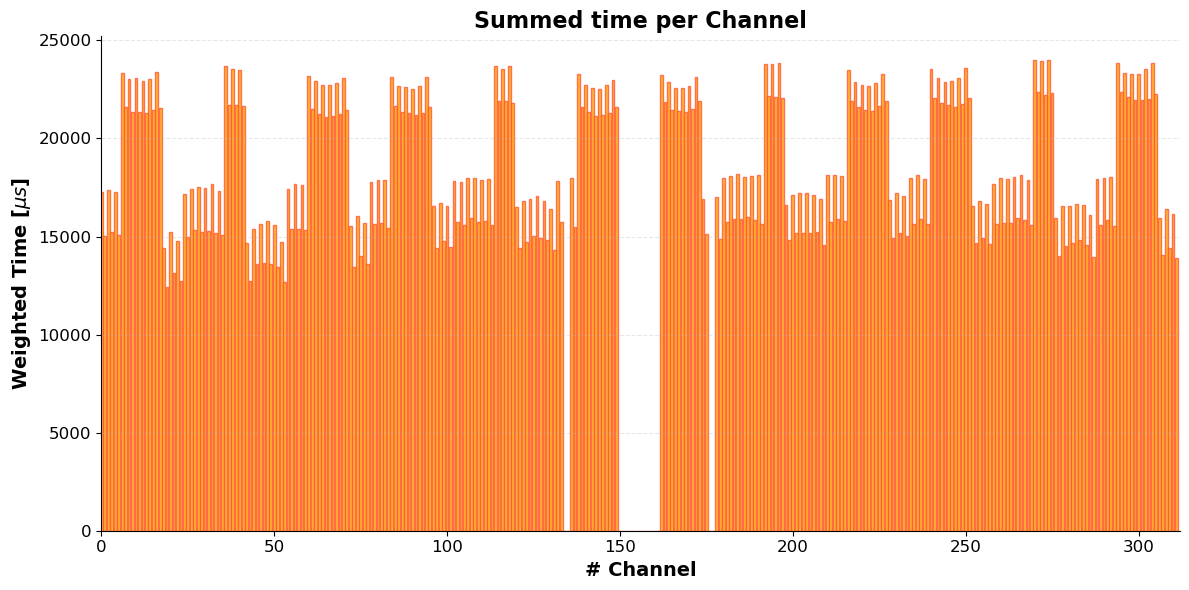

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Bar plot with transparency, gradient, and a modern color palette
plt.bar(range(len(tiempos_sums)), tiempos_sums, 
        color='orange', edgecolor='#FF5733', alpha=0.8)  # Adjusting transparency

# Axis labels with improved font size and weight
plt.xlabel('# Channel', fontsize=14, weight='bold')
plt.ylabel(r'Weighted Time [$\mu s$]', fontsize=14, weight='bold')
plt.title('Summed time per Channel', fontsize=16, weight='bold')

# Customize the x and y axis
plt.xlim(0, 312)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the grid and spines
plt.grid(axis='y', alpha=0.3, linestyle='--')  # Light dashed gridlines on the y-axis
plt.gca().spines['top'].set_visible(False)  # Hide the top border
plt.gca().spines['right'].set_visible(False)  # Hide the right border

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [27]:
fotoelectrones_part = fotoelectrones[1:200]
print(fotoelectrones_part.shape)

(199, 312)


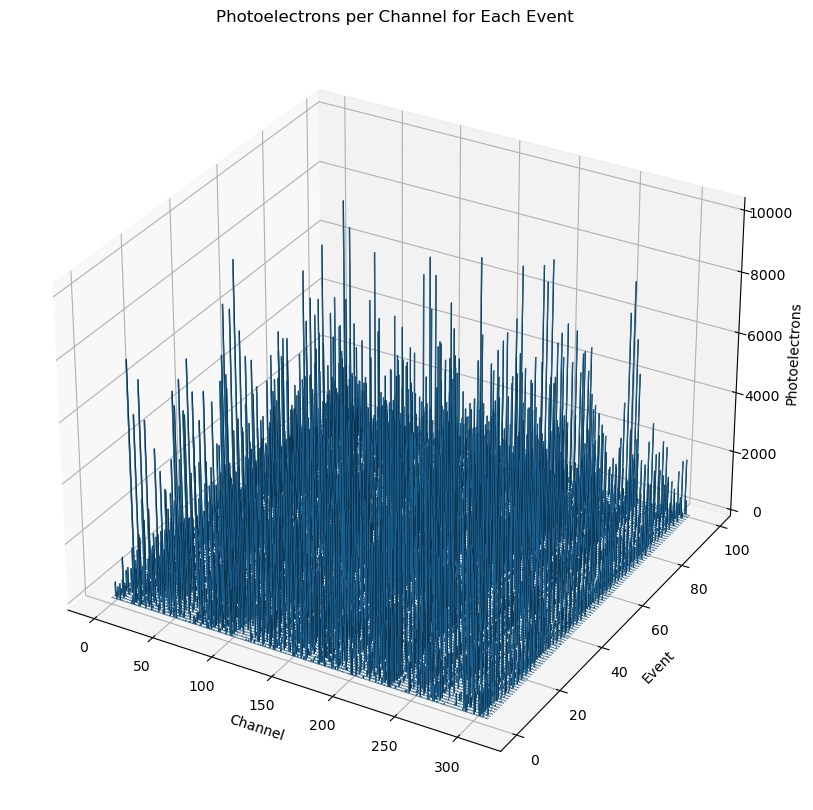

In [5]:
# Create a 3D plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
# Create the positions for the bars
x = np.arange(fotoelectrones_part.shape[1])  # Channels (0 to 311)
y = np.arange(fotoelectrones_part.shape[0])  # Events (0 to 8)
xpos, ypos = np.meshgrid(x, y, indexing="ij")  # Create a meshgrid for bar positions
xpos = xpos.flatten()  # Flatten the x positions
ypos = ypos.flatten()  # Flatten the y positions
zpos = np.zeros_like(xpos)  # Base of the bars

# Height of the bars is the value of PEs in the matrix
dz = fotoelectrones_part.flatten()  # Flatten the matrix for heights

# Set the width and depth of the bars
width = 0.4
depth = 0.4

# Create the bars
ax.bar3d(xpos, ypos, zpos, width, depth, dz, shade=True)

# Set labels and title
ax.set_xlabel('Channel')
ax.set_ylabel('Event')
ax.set_zlabel('Photoelectrons')
ax.set_title('Photoelectrons per Channel for Each Event')

# Show the plot
plt.show()


In [28]:
import plotly.graph_objects as go
import numpy as np

# Supongamos que fotoelectrones_part es tu matriz de datos
# fotoelectrones_part = ...

# Crear las posiciones para las barras
x = np.arange(fotoelectrones_part.shape[1])  # Canales (0 a 311)
y = np.arange(fotoelectrones_part.shape[0])  # Eventos (0 a 8)
xpos, ypos = np.meshgrid(x, y, indexing="ij")  # Crear una malla para las posiciones de las barras

# Crear la figura
fig = go.Figure(data=[go.Surface(z=fotoelectrones_part, x=xpos, y=ypos, surfacecolor=ypos)])

# Configurar etiquetas y título
fig.update_layout(
    scene=dict(
        xaxis_title='Channel',
        yaxis_title='Event',
        zaxis_title='Photoelectrons'
    ),
    title='Photoelectrons per Channel for Each Event',
    width=1500,  # Ancho de la figura
    height=1000  # Altura de la figura
)

# Mostrar la gráfica
fig.show()